# XOR problem
---

It is one of the simplest problem which can be solved by using artificial neural network (ANN). It is a classification problem with outputs of XOr logic gates given two binary inputs. The perceptrons models was unable to solve this  problem because XOR outputs are not linearly separable, which the perceptrons are unable to solve. The solution was to layer the simple perceptron units in order to create a layered architecture, also called a multilayer perceptron (MLP).

In [195]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(0)

In [196]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [197]:
class Neural_Network:
    def __init__(self, n_h, n_x, n_y):
        self.W1 = np.random.randn(n_h, n_x)
        self.B1 = np.zeros((n_h, 1))
        self.W2 = np.random.randn(n_y, n_h)
        self.B2 = np.zeros((n_y, 1))
        print(f"Initial Weights are \n {self.W1} \n ==== \n {self.W2} \nBiases \n {self.B1} \n ==== \n {self.B2}")
        
        
    def run(self, X, Y, epochs, alpha):
        costs = []
        for epoch in range(epochs):
            cost, params = self.forward_propagate(X, Y)
            if (epoch+1) % 500 == 0:
                print(f"Epoch: {epoch+1} and Cost: {cost}")
            costs.append(cost)
            grads = self.back_prop(X, Y, params)
            self.update_parameters(grads, alpha)
        return costs
    
    def forward_propagate(self, X, Y):
        m = X.shape[1] # Number of examples
        Z1 = np.dot(self.W1, X) + self.B1
        A1 = sigmoid(Z1)
        cost = []
        Z2 = np.dot(self.W2, A1) + self.B2
        A2 = sigmoid(Z2)
        if Y is not None:
            logprobs = np.multiply(np.log(A2), Y) + np.multiply((1 - Y), np.log(1 - A2))
            cost = -np.sum(logprobs) / m
        params = {"A1": A1, "A2": A2, "Z1": Z1}
        return cost, params
    
    def back_prop(self, X, Y, params):
        m = X.shape[1]
        A1 = params["A1"]
        A2 = params["A2"]
        Z1 = params["Z1"]
        
        dZ2 = A2 - Y
        dW2 = np.dot(dZ2, A1.T) / m
        dB2 = np.sum(dZ2, axis=1, keepdims=True) / m
        
        dZ1 = np.dot(self.W2.T, dZ2) * (A1 * (1 - A1))
        dW1 = np.dot(dZ1, X.T) / m
        dB1 = np.sum(dZ1, axis=1, keepdims=True) / m
        
        grads = {"dW1": dW1, "dW2": dW2, "dB1": dB1, "dB2": dB2}
        return grads
    
    def update_parameters(self, grads, alpha):
        dW1 = grads["dW1"]
        dW2 = grads["dW2"]
        dB1 = grads["dB1"]
        dB2 = grads["dB2"]
        
        self.W1 -= (alpha * dW1)
        self.W2 = self.W2 - (alpha * dW2)
        self.B1 = self.B1 - (alpha * dB1)
        self.B2 = self.B2 - (alpha * dB2)
#         print(f"--{alpha * dW2}")
        

X shape: (2, 4)
Input Features: 2, Output Shape: 1, and Hidden Units: 2


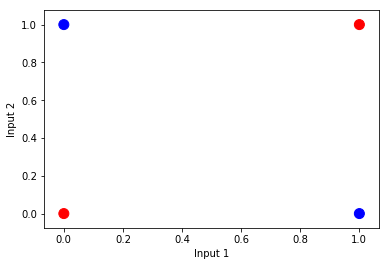

In [198]:
X = np.array([
    [0, 0, 1, 1],
    [0, 1, 0, 1],
])
Y = np.array([
    [0, 1, 1, 0],
])
n_h = 2 # Number of hidden units
n_x = X.shape[0] # Number of input features
n_y = Y.shape[0] # Number of output
print(f"X shape: {X.shape}")
print(f"Input Features: {n_x}, Output Shape: {n_y}, and Hidden Units: {n_h}")
color = np.array(['r', 'b'])
plt.scatter(X[0], X[1], s=100, c=color[Y[0]])
plt.xlabel("Input 1")
plt.ylabel("Input 2");

Initial Weights are 
 [[ 0.95008842 -0.15135721]
 [-0.10321885  0.4105985 ]] 
 ==== 
 [[0.14404357 1.45427351]] 
Biases 
 [[0.]
 [0.]] 
 ==== 
 [[0.]]
Epoch: 500 and Cost: 0.6931877887237535
Epoch: 1000 and Cost: 0.6931148697097858
Epoch: 1500 and Cost: 0.6930484440632818
Epoch: 2000 and Cost: 0.6928827813174931
Epoch: 2500 and Cost: 0.6922593740456319
Epoch: 3000 and Cost: 0.6885987921767969
Epoch: 3500 and Cost: 0.6482819905829398
Epoch: 4000 and Cost: 0.31699100596989294
Epoch: 4500 and Cost: 0.10018268156594384
Epoch: 5000 and Cost: 0.053146562370796416
Epoch: 5500 and Cost: 0.035314285484572605
Epoch: 6000 and Cost: 0.026212579109714647
Epoch: 6500 and Cost: 0.02075470962303229
Epoch: 7000 and Cost: 0.017138346248718427
Epoch: 7500 and Cost: 0.014574484522014012
Epoch: 8000 and Cost: 0.01266596988039301
Epoch: 8500 and Cost: 0.011192059047713213
Epoch: 9000 and Cost: 0.010020627995916744
Epoch: 9500 and Cost: 0.009067916962050756
Epoch: 10000 and Cost: 0.00827833235049774


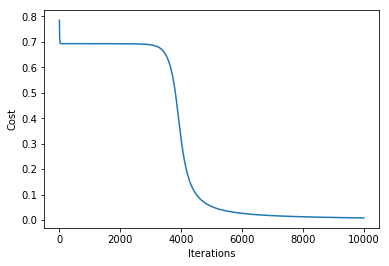

In [203]:
network = Neural_Network(n_h, n_x, n_y) # Create a network object
costs = network.run(X, Y, 10000, 0.2) # Run the network on the input.
plt.plot(costs)
plt.xlabel("Iterations")
plt.ylabel("Cost");

In [204]:
# Evaluate the model and oberve the final outputs.
cost, params = network.forward_propagate(X, Y)
print("Final Weights")
print(f"{network.W1}\n{network.W2}")
print("Final Biases")
print(f"{network.B1}\n{network.B2}")
print(f"Final Cost is: {cost:.5}")
print(f"Final predicted probabilities: {params['A2']}")
print(f"Final predicted outputs: {params['A2'].round()}")

Final Weights
[[ 6.75417655 -6.54157831]
 [ 6.04644699 -6.3021761 ]]
[[-10.53639208  11.15134922]]
Final Biases
[[ 3.28456121]
 [-3.22778341]]
[[4.91227222]]
Final Cost is: 0.0082769
Final predicted probabilities: [[0.00801441 0.98925424 0.99260554 0.0068117 ]]
Final predicted outputs: [[0. 1. 1. 0.]]


# Decision Boundary
Since the problem is not linearly separable, it would be interesting to see how the MLP separated the data.

In [205]:
def plot_decision_boundary(X, y, model, steps=1000, cmap='Paired'):
    """
    First limits of the plot are defined (generally from the data, but since it is small dataset)
    Evenly spaced data points are created using linspace and 2D mesh grid is obtained from meshgrid function.
    The network is run on all the points of the meshgrid and finnaly plotted using a filled contour
    diagram with predicted class.
    """
    # Limits of the graph.
    x1_min = 0 - 1
    x1_max = 1 + 1
    x2_min = 0 - 1
    x2_max = 1 + 1
    steps = 100
    # Create equal spaced points.
    x1_span = np.linspace(x1_min, x1_max, steps)
    x2_span = np.linspace(x2_min, x2_max, steps)
    # Create the mesh.
    xx, yy = np.meshgrid(x1_span, x2_span)
    X_new = np.c_[xx.ravel(), yy.ravel()]
    # Run the model on all the points of the meshgrid.
    cost, params = model.forward_propagate(X_new.T, None)
    labels = params["A2"].round()
    # Plot the results
    plt.contourf(xx, yy, labels.reshape(xx.shape), cmap='RdBu', alpha=0.8)
    plt.scatter(X[0], X[1], s=100, c=color[Y[0]])
    plt.xlabel("Input 1")
    plt.ylabel("Input 2")
    plt.title("Decision Boundary")

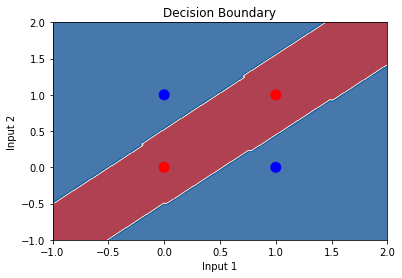

In [206]:
plot_decision_boundary(X, Y, network)

## Note -
- The network weights were not updating because the learning rate was too low, which required huge number of iterations. Increasing the LR solved the problem.